## SRM INSTITUTE OF SCIENCE AND TECHNOLOGY

### 20PAIE51J- MACHINE LEARNING (UNSUPERVISED MODEL)



### Hiearchial Clustering

#### a. Import required Library (2 marks)

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### b. Read the dataset (tab, csv, xls, txt, inbuilt dataset). (1 mark)

In [16]:
#Load dataset
df = pd.read_csv("MPA-1_forestfires.csv")

In [20]:
#Quick look
print(df.head(5))
print(df.shape)

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0
(517, 13)


### c. Perform explanotory data analysis on the dataset. (3 marks)

In [23]:
#Basic info
print("Dataset info:\n")
print(df.info())

Dataset info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB
None


In [33]:
#Summary Statistics
print("\nSummary Statistics:\n")
print(df.describe())


Summary Statistics:

                X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192    4.559477   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   68.600000  437.700000    6.500000   
50%      4.000000    4.000000   91.600000  108.300000  664.200000    8.400000   
75%      7.000000    5.000000   92.900000  142.400000  713.900000   10.800000   
max      9.000000    9.000000   96.200000  291.300000  860.600000   56.100000   

             temp          RH        wind        rain         area  
count  517.000000  517.000000  517.000000  517.000000   517.000000  
mean    18.889168   44.288201    4.017602    0.021663    12.847292  
std      5.806625   16.317469    1.791653

In [35]:
#Check missing values
print("Missing values:\n")
print(df.isnull().sum())

Missing values:

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64


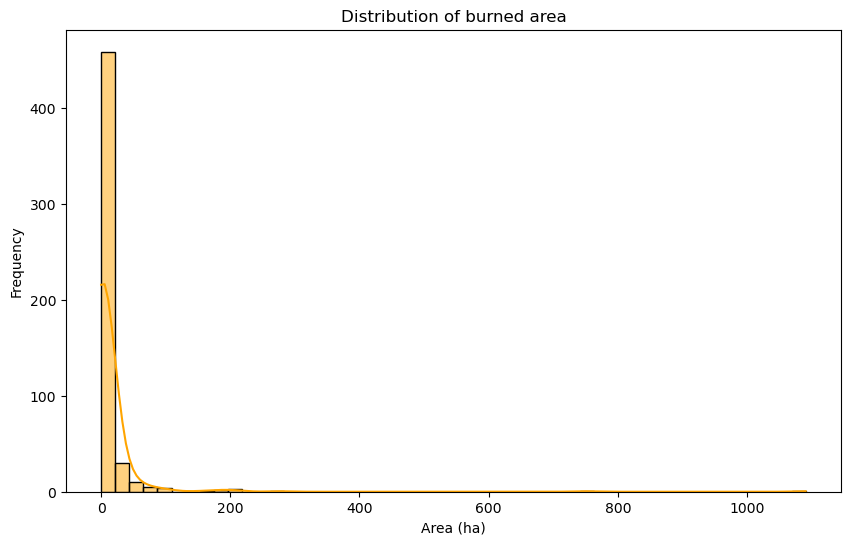

In [37]:
#Distribution of burned area
plt.figure(figsize=(10,6))
sns.histplot(df["area"], bins=50, kde=True, color="orange")
plt.title("Distribution of burned area")
plt.xlabel("Area (ha)")
plt.ylabel("Frequency")
plt.show()

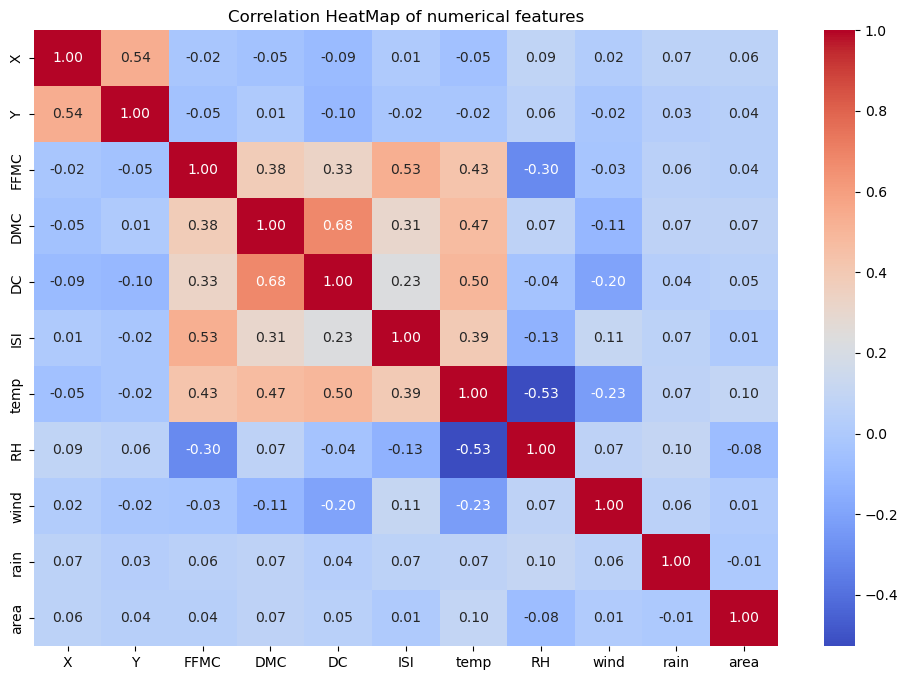

In [45]:
#Correlation HeatMap (numerical features only)
df_corr = df.drop(["month", "day"], axis=1)

plt.figure(figsize=(12,8))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation HeatMap of numerical features")
plt.show()

d. Plot the datapoints using Scatter Plot. (3 marks)

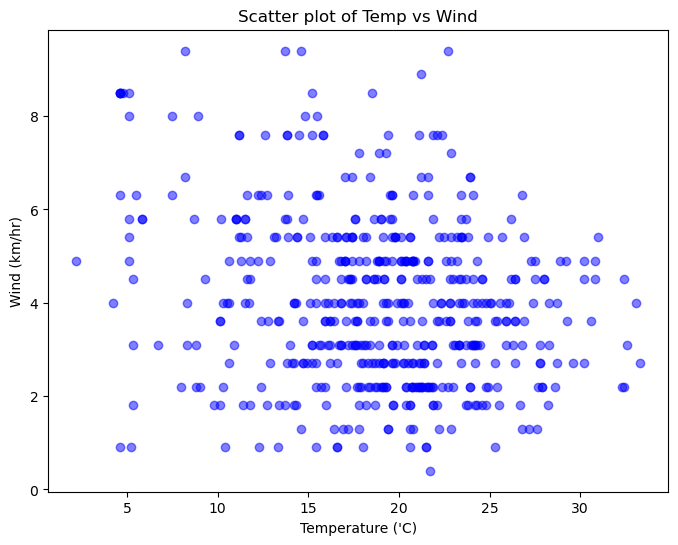

In [61]:
#Scatter plot of Temperature vs Wind

plt.figure(figsize=(8,6))
plt.scatter(df["temp"], df["wind"], c="blue", alpha=0.5)
plt.xlabel("Temperature ('C)")
plt.ylabel("Wind (km/hr)")
plt.title("Scatter plot of Temp vs Wind")
plt.show()

e. Apply five methods of agglomerative hierachial clustering. [Single, complete, average, centroid and ward's linkage method] (2 marks)

In [63]:
from scipy.cluster.hierarchy import linkage

In [67]:
##Choosing two numeric values
X = df[["temp", "wind"]].values

#Apply 5 linkage methods
methods = ['single', 'complete', 'average', 'centroid', 'ward']
linkages = {}

for method in methods:
    z = linkage(X, method=method)
    linkages[method] = z
    print(f"{method.capitalize()} linkage computed")
    

Single linkage computed
Complete linkage computed
Average linkage computed
Centroid linkage computed
Ward linkage computed


f. Draw dendrogram for the above five clustering methods. (2 marks)

In [71]:
from scipy.cluster.hierarchy import dendrogram

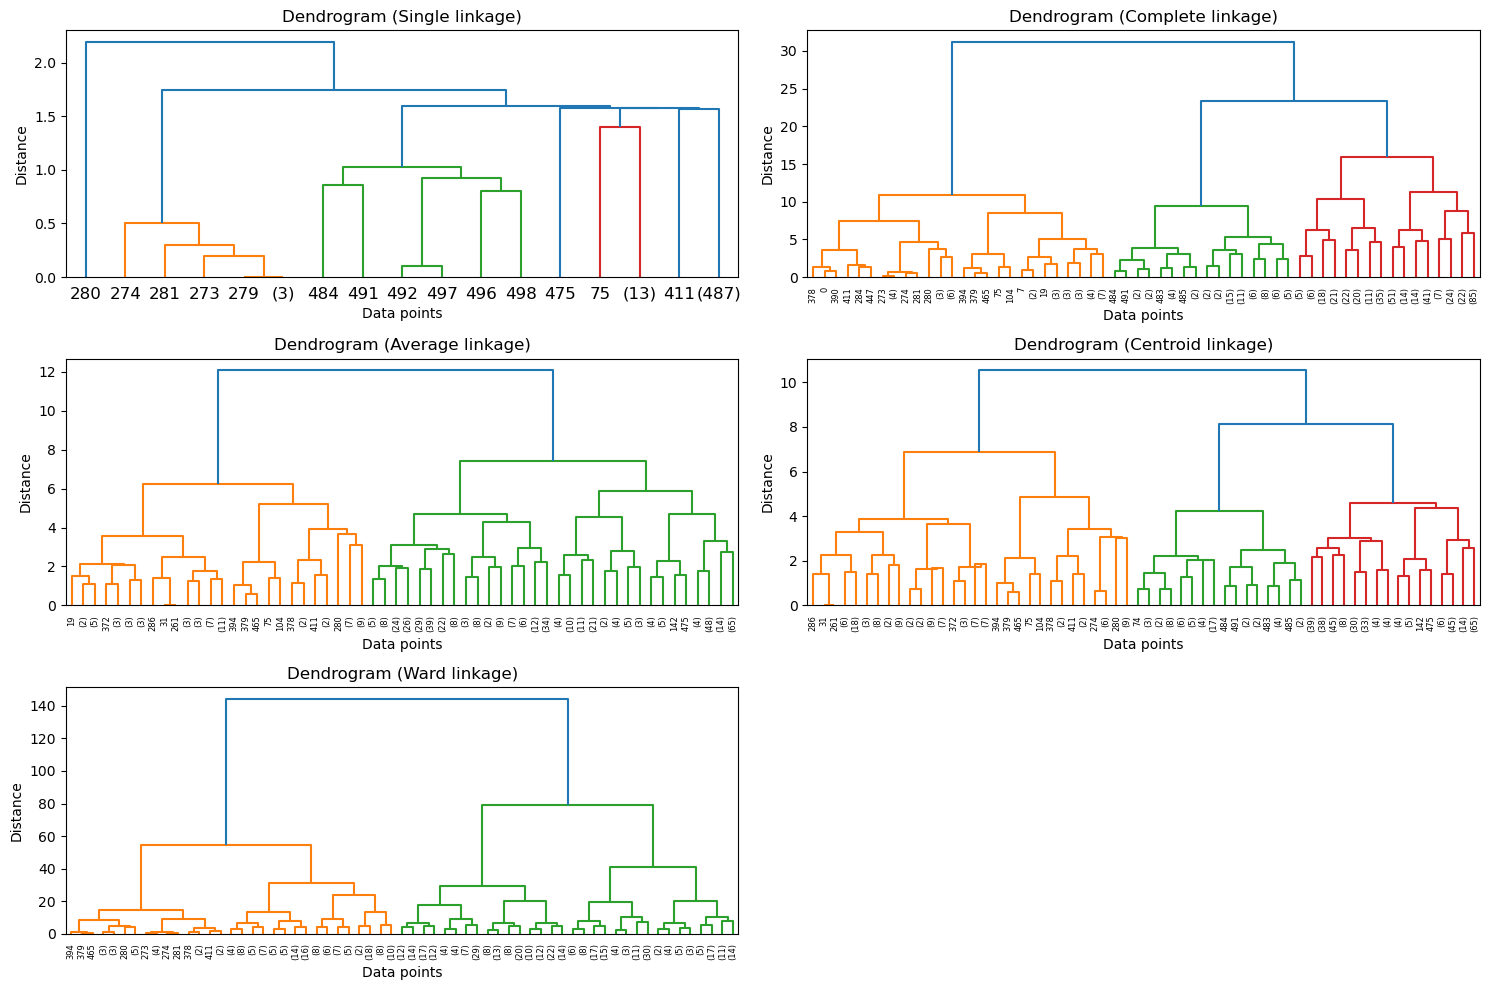

In [73]:
#Dendrogram plot for all five methods

plt.figure(figsize=(15,10))

for i, method in enumerate(methods, 1):
    plt.subplot(3,2,i)
    dendrogram(linkages[method], truncate_mode="level", p=5)
    plt.title(f"Dendrogram ({method.capitalize()} linkage)")
    plt.xlabel("Data points")
    plt.ylabel("Distance")

plt.tight_layout()
plt.show()

g. Calculate Cophenet Coorelation coefficient for the above five methods. (4 marks)

In [75]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [79]:
#Dictionary to store cophenet scores
coph_scores = {}

# Calculate for each method
for method in methods:
    Z = linkages[method]
    coph_corr, _ = cophenet(Z, pdist(X))   # X = df[['temp','wind']].values
    coph_scores[method] = coph_corr

print("Cophenet Correlation Coefficients:")
for method, score in coph_scores.items():
    print(f"{method.capitalize()} linkage: {score:.4f}")

Cophenet Correlation Coefficients:
Single linkage: 0.6563
Complete linkage: 0.7090
Average linkage: 0.6998
Centroid linkage: 0.7010
Ward linkage: 0.6175


h. Plot the best method labels using the scatter plot. (3 marks)

In [81]:
from scipy.cluster.hierarchy import fcluster

Best Method: complete


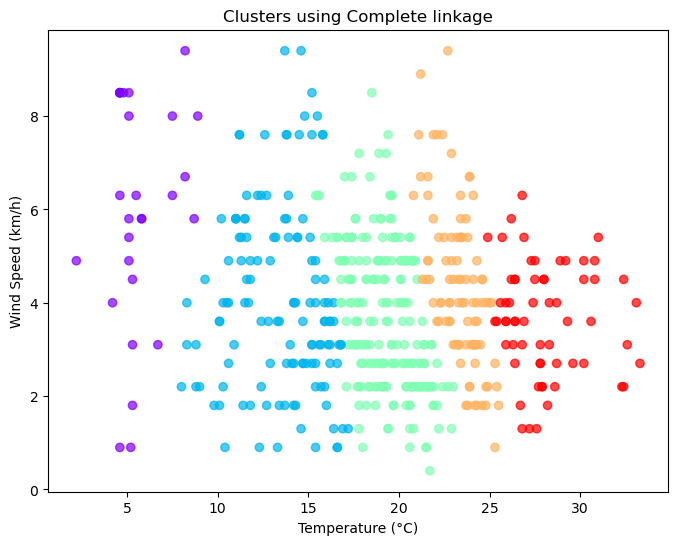

In [85]:
#Finding the best method(highest cophenet coefficient)
best_method = max(coph_scores, key=coph_scores.get)
print("Best Method:", best_method)

#Linkages for best method
z_best = linkages[method]

#Cluster assignation, t is the no.of clusters
clusters = fcluster(z_best, t=5, criterion="maxclust")

#Scatter plot with cluster labels
plt.figure(figsize=(8,6))
plt.scatter(df['temp'], df['wind'], c=clusters, cmap='rainbow', alpha=0.7)
plt.xlabel("Temperature (°C)")
plt.ylabel("Wind Speed (km/h)")
plt.title(f"Clusters using {best_method.capitalize()} linkage")
plt.show()

### Applied hierarchical clustering on the forestfires dataset using five linkage methods (single, complete, average, centroid, ward). Dendrograms were drawn to visualize how clusters merge, and the Cophenet Correlation Coefficient was calculated to evaluate each method’s accuracy. The method with the highest coefficient was chosen as the best, and its cluster labels were plotted on a scatter plot to show how the data points group together. This completes the full assignment hierarchy from data exploration to clustering evaluation.